# Support Vector Machines Lab

In this lab we will explore several datasets with SVMs. The assets folder contains several datasets (in order of complexity):

1. Breast cancer
- Spambase
- Car evaluation
- Mushroom

For each of these a `.names` file is provided with details on the origin of data.

In [1]:
import pandas as pd

# Exercise 1: Breast Cancer



## 1.a: Load the Data
Use `pandas.read_csv` to load the data and assess the following:
- Are there any missing values? (how are they encoded? do we impute them?)
- Are the features categorical or numerical?
- Are the values normalized?
- How many classes are there in the target?

Perform what's necessary to get to a point where you have a feature matrix `X` and a target vector `y`, both with only numerical entries.

In [2]:
brst_cncr = pd.read_csv('./../../assets/datasets/breast_cancer.csv')
brst_cncr.head()

Sample_code_number  Clump_Thickness  Uniformity_of_Cell_Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity_of_Cell_Shape  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

  Bare_Nuclei  Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0           1                3                1        1      2  
1          10                3                2        1      2  
2           2                3                1        1      2  
3           4                3                7        1      2  
4           1                3                1        1      2

In [3]:
brst_cncr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_of_Cell_Size        699 non-null int64
Uniformity_of_Cell_Shape       699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [4]:
for i in brst_cncr['Bare_Nuclei']:
    if i == '?':
        print i

?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?


There appear to be some missing values in Bare_Nuclei.  I will remove these rows as there are not many containing the missing values.

In [5]:
brst_cncr = brst_cncr[brst_cncr['Bare_Nuclei'] != '?']
brst_cncr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             683 non-null int64
Clump_Thickness                683 non-null int64
Uniformity_of_Cell_Size        683 non-null int64
Uniformity_of_Cell_Shape       683 non-null int64
Marginal_Adhesion              683 non-null int64
Single_Epithelial_Cell_Size    683 non-null int64
Bare_Nuclei                    683 non-null object
Bland_Chromatin                683 non-null int64
Normal_Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


## 1.b: Model Building

- What's the baseline for the accuracy?
- Initialize and train a linear svm. What's the average accuracy score with a 3-fold cross validation?
- Repeat using an rbf classifier. Compare the scores. Which one is better?
- Are your features normalized? if not, try normalizing and repeat the test. Does the score improve?
- What's the best model?
- Print a confusion matrix and classification report for your best model using:
        train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)

**Check** to decide which model is best, look at the average cross validation score. Are the scores significantly different from one another?

In [6]:
# What's the baseline for the accuracy?
print 'The baseline for accuracy is',brst_cncr['Class'].value_counts()[2]/float(sum(brst_cncr['Class'].value_counts()))


The baseline for accuracy is 0.650073206442


In [7]:
# Initialize and train a linear svm. What's the average accuracy score with a 3-fold cross validation?
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
X = brst_cncr[['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape', 'Marginal_Adhesion',
              'Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']]
y = []
for i in brst_cncr['Class']:
    if i == 2:
        y.append(0)
    else:
        y.append(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

print 'The average accuracy score with a 3-fold cross validation is', np.mean(cross_val_score(clf, X, y, cv=3))

The average accuracy score with a 3-fold cross validation is 0.96489295927


In [8]:
# Repeat using an rbf classifier. Compare the scores. Which one is better?
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

print 'The average accuracy score with a 3-fold cross validation is', np.mean(cross_val_score(clf, X, y, cv=3))
print 'The linear is better is this case.'

The average accuracy score with a 3-fold cross validation is 0.95758301775
The linear is better is this case.


In [9]:
# Are your features normalized? if not, try normalizing and repeat the test. Does the score improve?
from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()
sclr.fit(X)
X_scld = sclr.transform(X)
X_scld
X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size=0.33, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

print 'The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is', np.mean(cross_val_score(clf, X_scld, y, cv=3))

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)

# What's the best model?
print 'The average accuracy score with a 3-fold cross validation is when features are normalized is and the classifier is rbf is', np.mean(cross_val_score(clf, X, y, cv=3))
print 'The linear is still better is this case.'

The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is 0.966354947575
The average accuracy score with a 3-fold cross validation is when features are normalized is and the classifier is rbf is 0.95758301775
The linear is still better is this case.


In [10]:
# Print a confusion matrix and...
from sklearn.metrics import confusion_matrix, classification_report
X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size=0.33, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

con = pd.DataFrame(confusion_matrix(y_test, y_pred))
con.columns = ['pred benign', 'pred not cancer']
con.index = ['benign', 'cancer']
con

pred benign  pred not cancer
benign          140                2
cancer            8               76

In [11]:
# ...classification report for your best model
print classification_report(y_test, y_pred)

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       142
          1       0.97      0.90      0.94        84

avg / total       0.96      0.96      0.96       226



**Check:** Are there more false positives or false negatives? Is this good or bad?

It seems like there are more false negatives, which is probably a bad thing.

## 1.c: Feature Selection

Use any of the strategies offered by `sklearn` to select the most important features.

Repeat the cross validation with only those 5 features. Does the score change?

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
sclr = StandardScaler()
sclr.fit(X_new)
X_scld = sclr.transform(X_new)
X_scld

X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size=0.33, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

print 'The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is', np.mean(cross_val_score(clf, X_scld, y, cv=3))
print 'The score went down a bit.'

The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is 0.959045006054
The score went down a bit.


## 1.d: Learning Curves

Learning curves are useful to study the behavior of training and test errors as a function of the number of datapoints available.

- Plot learning curves for train sizes between 10% and 100% (use StratifiedKFold with 5 folds as cross validation)
- What can you say about the dataset? do you need more data or do you need a better model?

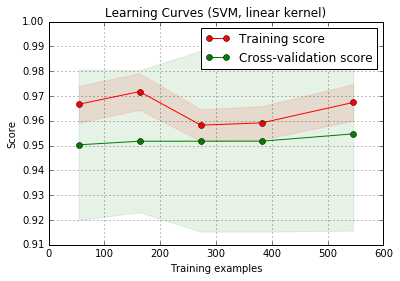

In [13]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, y, train_sizes=[.1, .3, .5, .7, 1], cv=5)
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
% matplotlib inline


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (SVM, linear kernel)"
plot_learning_curve(SVC(kernel='linear'), title, X_scld, y, train_sizes=[.1, .3, .5, .7, 1], cv=5)

plt.show()

##  1.e: Grid Ssearch

Use the grid_search function to explore different kernels and values for the C parameter.

- Can you improve on your best previous score?
- Print the best parameters and the best score

In [14]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(clf, param_grid=[{'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear','rbf']}])
gs.fit(X_scld, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [15]:
gs.best_params_

{'C': 0.01, 'kernel': 'rbf'}

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size=0.33, random_state=42)

clf = SVC(kernel='rbf', C=0.01)
clf.fit(X_train, y_train)

print 'The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is', np.mean(cross_val_score(clf, X_scld, y, cv=3))
print 'The score went up, but it is still not as good as the original.'

The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is 0.961975423139
The score went up, but it is still not as good as the original.


# Exercise 2
Now that you've completed steps 1.a through 1.e it's time to tackle some harder datasets. But before we do that, let's encapsulate a few things into functions so that it's easier to repeat the analysis.

## 2.a: Cross Validation
Implement a function `do_cv(model, X, y, cv)` that does the following:
- Calculates the cross validation scores
- Prints the model
- Prints and returns the mean and the standard deviation of the cross validation scores

> Answer: see above

## 2.b: Confusion Matrix and Classification report
Implement a function `do_cm_cr(model, X, y, names)` that automates the following:
- Split the data using `train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)`
- Fit the model
- Prints confusion matrix and classification report in a nice format

**Hint:** names is the list of target classes

> Answer: see above

## 2.c: Learning Curves
Implement a function `do_learning_curve(model, X, y, sizes)` that automates drawing the learning curves:
- Allow for sizes input
- Use 5-fold StratifiedKFold cross validation

> Answer: see above

## 2.d: Grid Search
Implement a function `do_grid_search(model, parameters)` that automates the grid search by doing:
- Calculate grid search
- Print best parameters
- Print best score
- Return best estimator


> Answer: see above

In [17]:
# Implement a function do_cv(model, X, y, cv) that does the following:
# Calculates the cross validation scores
# Prints the model
# Prints and returns the mean and the standard deviation of the cross validation scores

def do_cv(model, X, y, cv):
    listy = []
    scr = cross_val_score(model, X, y, cv=cv)
    listy.append(np.mean(scr))
    listy.append(np.std(scr))
    return listy

print do_cv(clf, X_scld, y, 3)

[0.96197542313934614, 0.025138026192364073]


In [18]:
# Implement a function do_cm_cr(model, X, y, names) that automates the following:
# Split the data using train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
# Fit the model
# Prints confusion matrix and classification report in a nice format

def do_cm_cr(model, X, y, names):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print classification_report(y_test, y_pred)
    con = pd.DataFrame(confusion_matrix(y_test, y_pred))
    con.columns = ['pred '+names[0], 'pred '+names[1]]
    con.index = [names]
    print con
    return

do_cm_cr(clf, X_scld, y, ['benign', 'cancer'])

             precision    recall  f1-score   support

          0       0.97      0.97      0.97       147
          1       0.94      0.94      0.94        79

avg / total       0.96      0.96      0.96       226

        pred benign  pred cancer
benign          142            5
cancer            5           74


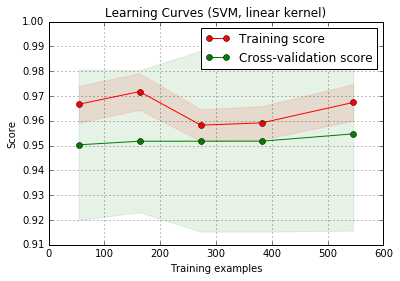

In [20]:
# Implement a function do_learning_curve(model, X, y, sizes) that automates drawing the learning curves:
# Allow for sizes input
# Use 5-fold StratifiedKFold cross validation

def plot_learning_curve(model, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(SVC(kernel='linear'), "Learning Curves (SVM, linear kernel)", X_scld, y, train_sizes=[.1, .3, .5, .7, 1], cv=5)
plt.show()

In [21]:
# Implement a function do_grid_search(model, parameters) that automates the grid search by doing:
# Calculate grid search
# Print best parameters
# Print best score
# Return best estimator

def do_grid_search(model, X, y, parameters):
    gs = GridSearchCV(model, param_grid=parameters)
    gs.fit(X, y)
    print gs.best_params_
    print gs.best_score_
    return gs.best_estimator_

parameters = [{'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear','rbf']}]
do_grid_search(clf, X_scld, y, parameters)

{'kernel': 'rbf', 'C': 0.01}
0.961932650073


SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Exercise 3
Using the functions above, analyze the Spambase dataset.

Notice that now you have many more features. Focus your attention on step C => feature selection

- Load the data and get to X, y
- Select the 15 best features
- Perform grid search to determine best model
- Display learning curves

In [22]:
# Load the data and get to X, y
spam = pd.read_csv('./../../assets/datasets/spambase.csv')
spam.head()
X = spam.drop('class', axis=1)
y = spam['class']
X.head()

word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   
3            0.00               0.00           0.00           0.0   
4            0.00               0.00           0.00           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   
3           0.63            0.00              0.31                0.63   
4           0.63            0.00              0.31                0.63   

   word_freq_order  word_freq_mail            ...             \
0             0.00            0.00            ...              
1             0.00            0.94            ...              
2             0.64            0.25            ...              
3             0.31            0.63            ...              
4             0.31            0.63            ...              

   word_freq_conference  char_freq_;  char_freq_(  char_freq_[  char_freq_!  \
0                   0.0         0.00        0.000          0.0        0.778   
1                   0.0         0.00        0.132          0.0        0.372   
2                   0.0         0.01        0.143          0.0        0.276   
3                   0.0         0.00        0.137          0.0        0.137   
4                   0.0         0.00        0.135          0.0        0.135   

   char_freq_$  char_freq_#  capital_run_length_average  \
0        0.000        0.000                       3.756   
1        0.180        0.048                       5.114   
2        0.184        0.010                       9.821   
3        0.000        0.000                       3.537   
4        0.000        0.000                       3.537   

   capital_run_length_longest  capital_run_length_total  
0                          61                       278  
1                         101                      1028  
2                         485                      2259  
3                          40                       191  
4                          40                       191  

[5 rows x 57 columns]

In [23]:
# Select the 15 best features
X_new = SelectKBest(chi2, k=15).fit_transform(X, y)
sclr = StandardScaler()
sclr.fit(X_new)
X_scld = sclr.transform(X_new)
X_scld.shape

(4601, 15)

In [24]:
# Perform grid search to determine best model
clf = SVC()
do_cm_cr(clf, X_scld, y, ['benign', 'cancer'])
parameters = [{'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear','rbf']}]
do_grid_search(clf, X_scld, y, parameters)

             precision    recall  f1-score   support

          0       0.90      0.95      0.92       920
          1       0.91      0.84      0.88       599

avg / total       0.91      0.91      0.90      1519

        pred benign  pred cancer
benign          871           49
cancer           95          504
{'kernel': 'rbf', 'C': 10}
0.899587046294


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
y.value_counts()

0    2788
1    1813
Name: class, dtype: int64

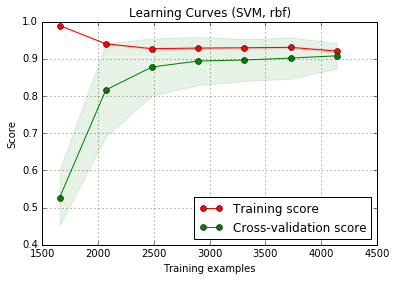

In [26]:
# Display learning curves
model = SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
plot_learning_curve(model, "Learning Curves (SVM, rbf)", X_scld, y, train_sizes=[.4, .5, .6, .7, .8, .9, 1], cv=10)
plt.show()

# Exercise 4
Repeat steps 1.a - 1.e for the car dataset. Notice that now features are categorical, not numerical.
- Find a suitable way to encode them
- How does this change our modeling strategy?

Also notice that the target variable `acceptability` has 4 classes. How do we encode them?


In [46]:
# 1.a: Load the Data
car = pd.read_csv('./../../assets/datasets/car.csv')
car.head()

buying  maint doors persons lug_boot safety acceptability
0  vhigh  vhigh     2       2    small    low         unacc
1  vhigh  vhigh     2       2    small    med         unacc
2  vhigh  vhigh     2       2    small   high         unacc
3  vhigh  vhigh     2       2      med    low         unacc
4  vhigh  vhigh     2       2      med    med         unacc

In [62]:
from sklearn.preprocessing import LabelEncoder
# Get dummies for X and make y categorical
X = pd.get_dummies(car.drop('acceptability', axis=1))
le = LabelEncoder()
y = le.fit_transform(car['acceptability'])
print y[:5]
print X.shape

[2 2 2 2 2]
(1728, 21)


# The code below keeps throwing the same error and I can't figure out why

In [74]:
# 1.b: Model Building
# What's the baseline for the accuracy?
# Initialize and train a linear svm. What's the average accuracy score with a 3-fold cross validation?
# Repeat using an rbf classifier. Compare the scores. Which one is better?
# Are your features normalized? if not, try normalizing and repeat the test. Does the score improve?
# What's the best model?
# Print a confusion matrix and classification report

print 'Baseline is', max(pd.Series(y).value_counts()) / float(sum(pd.Series(y).value_counts()))
sclr = StandardScaler()
sclr.fit(X)
X_scld = sclr.transform(X)
print X_scld.shape
print y.shape
X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size=0.33, random_state=42)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print 'The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is', np.mean(cross_val_score(clf, X_scld, y, cv=3))


Baseline is 0.700231481481
(1728, 21)
(1728,)
The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is 0.650843905327


In [65]:
# 1.c: Feature Selection
# Use any of the strategies offered by sklearn to select the most important features.
# Repeat the cross validation with only those 5 features. Does the score change?

X_new = SelectKBest(chi2, k=5).fit_transform(X, y)
sclr = StandardScaler()
sclr.fit(X_new)
X_scld = sclr.transform(X_new)
X_scld

X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size=0.33, random_state=42)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

print 'The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is', np.mean(cross_val_score(clf, X_scld, y, cv=3))
print 'The score went down a bit.'

The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is 0.603377988276
The score went down a bit.


In [72]:
pd.Series(y).value_counts()

2    1210
0     384
1      69
3      65
dtype: int64

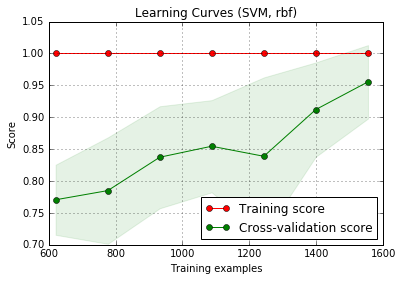

Definitely need a better model.


In [80]:
# 1.d: Learning Curves
# Learning curves are useful to study the behavior of training and test errors as a function of the number of datapoints available.
# Plot learning curves for train sizes between 10% and 100% (use StratifiedKFold with 5 folds as cross validation)
# What can you say about the dataset? do you need more data or do you need a better model?

plot_learning_curve(model, "Learning Curves (SVM, rbf)", X_scld, y, train_sizes=[.4, .5, .6, .7, .8, .9, 1], cv=10)
plt.show()

plt.show()
print 'Definitely need a better model.'

In [77]:
# 1.e: Grid Ssearch
# Use the grid_search function to explore different kernels and values for the C parameter.
# Can you improve on your best previous score?
# Print the best parameters and the best score

gs = GridSearchCV(clf, param_grid=[{'C':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel':['linear','rbf']}])
gs.fit(X_scld, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear', 'rbf'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [78]:
gs.best_params_

{'C': 0.1, 'kernel': 'rbf'}

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scld, y, test_size=0.33, random_state=42)

clf = SVC(kernel='rbf', C=0.1)
clf.fit(X_train, y_train)

print 'The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is', np.mean(cross_val_score(clf, X_scld, y, cv=3))
print 'The score went up, but it is still not as good as the original.'

The average accuracy score with a 3-fold cross validation when features are normalized and the classifier is linear is 0.72396779423
The score went up, but it is still not as good as the original.


# Bonus
Repeat steps 1.a - 1.e for the mushroom dataset. Notice that now features are categorical, not numerical. This dataset is quite large.
- How does this change our modeling strategy?
- Can we use feature selection to improve this?
